# Lab 5 - Using link functions to create generalized linear models

In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
data = pd.read_csv('Airline_data.csv')
N_years = len(data['Year'])
data_sim = {'N_years': N_years,
            'miles_flown': data['Miles flown [100 mln miles]'].values / 1000}

data

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


## Testing priors

In [3]:
model_prior=CmdStanModel(stan_file='model1_prior.stan')

R = 1000
sim=model_prior.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

sim.summary()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0,NaN,0.00,0.000,0.0,0.00,NaN,NaN,NaN
alpha_,3.0,0.03600,1.20,1.200,3.0,5.00,1000.0,21000.0,1.0
theta_,0.1,0.00032,0.01,0.083,0.1,0.12,990.0,20000.0,1.0
lambda[1],61.0,4.10000,127.00,4.800,29.0,218.00,963.0,19266.0,1.0
lambda[2],64.0,4.30000,133.00,5.000,30.0,228.00,964.0,19281.0,1.0
lambda[3],69.0,4.60000,144.00,5.300,33.0,247.00,965.0,19306.0,1.0
lambda[4],72.0,4.80000,151.00,5.600,34.0,259.00,966.0,19321.0,1.0
lambda[5],75.0,5.00000,156.00,5.700,35.0,268.00,967.0,19332.0,1.0
lambda[6],76.0,5.10000,159.00,5.800,36.0,274.00,967.0,19339.0,1.0


In [4]:
df1 = sim.draws_pd()
df1

,lp__,accept_stat__,alpha_,theta_,lambda[1],lambda[2],lambda[3],lambda[4],lambda[5],lambda[6],...,accidents[1],accidents[2],accidents[3],accidents[4],accidents[5],accidents[6],accidents[7],accidents[8],accidents[9],accidents[10]
0,0.0,0.0,6.24980,0.107772,785.34800,823.22000,890.3130,934.9580,969.1210,992.2670,...,781.0,760.0,902.0,863.0,991.0,1031.0,988.0,1018.0,1235.0,1105.0
1,0.0,0.0,4.86189,0.096378,187.57900,195.64800,209.8480,219.2340,226.3840,231.2130,...,187.0,206.0,217.0,213.0,214.0,209.0,223.0,207.0,256.0,256.0
2,0.0,0.0,1.81045,0.118121,9.64800,10.15910,11.0701,11.6799,12.1485,12.4669,...,12.0,16.0,18.0,15.0,13.0,9.0,13.0,14.0,25.0,11.0
3,0.0,0.0,2.27532,0.111276,14.95700,15.70230,17.0254,17.9076,18.5836,19.0421,...,16.0,18.0,15.0,16.0,23.0,22.0,18.0,18.0,18.0,21.0
4,0.0,0.0,2.81031,0.093903,23.88030,24.88070,26.6385,27.7987,28.6817,29.2777,...,28.0,30.0,29.0,24.0,51.0,25.0,37.0,35.0,41.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,2.48730,0.095994,17.42880,18.17550,19.4892,20.3574,21.0186,21.4652,...,14.0,16.0,18.0,16.0,27.0,14.0,18.0,24.0,25.0,15.0
996,0.0,0.0,1.82484,0.101512,9.17954,9.59592,10.3309,10.8181,11.1901,11.4416,...,10.0,15.0,10.0,10.0,11.0,11.0,12.0,18.0,11.0,13.0
997,0.0,0.0,2.29255,0.087137,13.86220,14.40020,15.3419,15.9610,16.4310,16.7475,...,13.0,15.0,17.0,21.0,18.0,13.0,16.0,13.0,16.0,20.0
998,0.0,0.0,2.71282,0.101121,22.27460,23.28100,25.0569,26.2341,27.1325,27.7401,...,26.0,26.0,28.0,24.0,17.0,25.0,30.0,34.0,30.0,34.0


We can see that every case of accidents vector looks similar, so I plot histogram only for one example column.

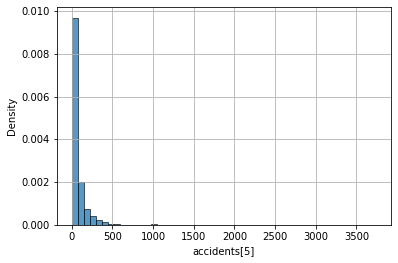

In [5]:
sns.histplot(data=df1, x=df1["accidents[5]"], stat="density", bins=50)
plt.grid()
plt.show()

## Fit the model

In [13]:
data_sim2 = {'N_years': N_years,
            'miles_flown': data['Miles flown [100 mln miles]'].values / 1000,
            'y_fit': data['Fatal accidents'].values}

model_fit=CmdStanModel(stan_file='model1_fit.stan')

R = 1000
sim=model_fit.sample(data=data_sim2, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

sim.summary()

INFO:cmdstanpy:compiling stan file /home/Lab5/model1_fit.stan to exe file /home/Lab5/model1_fit
INFO:cmdstanpy:compiled model executable: /home/Lab5/model1_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/Lab5/model1_fit.hpp /home/Lab5/model1_fit.stan
Warning in '/home/Lab5/model1_fit.stan', line 4, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/Lab5/model1_fit.stan', line 25, column 3: Declaration of
    arrays by placing brackets after a variable name is deprecated and will
    be removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I 


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0,NaN,0.000000e+00,0.0,0.0,0.0,NaN,NaN,NaN
alpha_,-0.2,NaN,1.400000e-16,-0.2,-0.2,-0.2,NaN,NaN,NaN
theta_,0.9,NaN,5.100000e-15,0.9,0.9,0.9,NaN,NaN,NaN
lambda[1],26.0,NaN,6.000000e-14,26.0,26.0,26.0,NaN,NaN,NaN
lambda[2],39.0,NaN,7.100000e-14,39.0,39.0,39.0,NaN,NaN,NaN
lambda[3],75.0,NaN,8.500000e-14,75.0,75.0,75.0,NaN,NaN,NaN
lambda[4],113.0,NaN,4.100000e-13,113.0,113.0,113.0,NaN,NaN,NaN
lambda[5],152.0,NaN,4.500000e-13,152.0,152.0,152.0,NaN,NaN,NaN
lambda[6],186.0,NaN,2.300000e-13,186.0,186.0,186.0,NaN,NaN,NaN


In [15]:
df2 = sim.draws_pd()
df2

,lp__,accept_stat__,alpha_,theta_,lambda[1],lambda[2],lambda[3],lambda[4],lambda[5],lambda[6],...,accidents[1],accidents[2],accidents[3],accidents[4],accidents[5],accidents[6],accidents[7],accidents[8],accidents[9],accidents[10]
0,0.0,0.0,-0.203359,0.899524,26.3509,39.0403,75.0795,112.948,152.394,185.577,...,27.0,43.0,70.0,96.0,155.0,191.0,145.0,226.0,650.0,427.0
1,0.0,0.0,-0.203359,0.899524,26.3509,39.0403,75.0795,112.948,152.394,185.577,...,33.0,37.0,85.0,87.0,169.0,189.0,155.0,217.0,666.0,539.0
2,0.0,0.0,-0.203359,0.899524,26.3509,39.0403,75.0795,112.948,152.394,185.577,...,25.0,25.0,99.0,106.0,160.0,200.0,180.0,233.0,646.0,466.0
3,0.0,0.0,-0.203359,0.899524,26.3509,39.0403,75.0795,112.948,152.394,185.577,...,22.0,39.0,84.0,119.0,147.0,175.0,143.0,216.0,691.0,467.0
4,0.0,0.0,-0.203359,0.899524,26.3509,39.0403,75.0795,112.948,152.394,185.577,...,25.0,39.0,65.0,134.0,162.0,193.0,156.0,218.0,655.0,453.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,-0.203359,0.899524,26.3509,39.0403,75.0795,112.948,152.394,185.577,...,34.0,46.0,64.0,118.0,153.0,167.0,159.0,234.0,659.0,488.0
996,0.0,0.0,-0.203359,0.899524,26.3509,39.0403,75.0795,112.948,152.394,185.577,...,22.0,38.0,81.0,115.0,144.0,191.0,161.0,249.0,640.0,454.0
997,0.0,0.0,-0.203359,0.899524,26.3509,39.0403,75.0795,112.948,152.394,185.577,...,24.0,50.0,73.0,103.0,166.0,175.0,170.0,204.0,644.0,508.0
998,0.0,0.0,-0.203359,0.899524,26.3509,39.0403,75.0795,112.948,152.394,185.577,...,27.0,31.0,75.0,102.0,145.0,201.0,154.0,243.0,633.0,474.0


### Histograms of accidents for each year

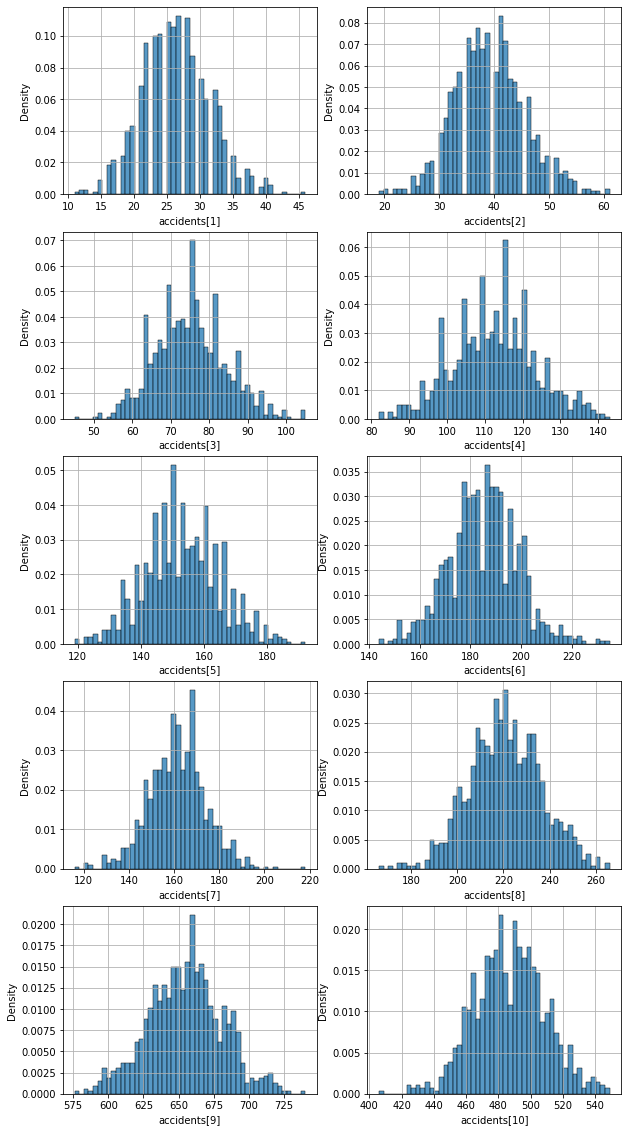

In [17]:
fig, axis = plt.subplots(5,2,figsize=(10,20))
axis = axis.flatten()

for n in range(N_years):
    sns.histplot(data=df2, x=df2[f"accidents[{n+1}]"], stat="density", bins=50, ax=axis[n])
    axis[n].grid()

plt.show()

### Histogram of accidents for entire period

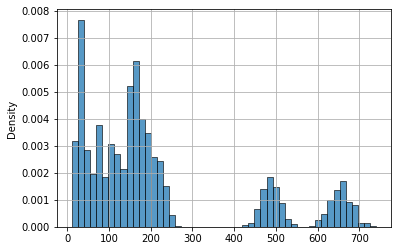

In [19]:
entire_period = []

for n in range(N_years):
    entire_period.append(df2[f"accidents[{n+1}]"])

sns.histplot(data=pd.concat(entire_period), stat="density", bins=50)
plt.grid()
plt.show()